In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
results = """
Camera v1
{'mae': 0.27153275613021877, 'rmse': 0.38624637618598856, 'max': 1.7149375548548547, 'failure_rate': 2.816812454605741, 'distance': 7315.052901123929, 'distance_per_intervention': 166.2512022982711, 'interventions': 44, 'whiteness': 41.360333291154326, 'cmd_whiteness': 109.99070489664071, 'expert_whiteness': 23.387318346549534}
Camera v2
{'mae': 0.2906035008268023, 'rmse': 0.3945015027452876, 'max': 1.6012950573699283, 'failure_rate': 3.3145858908841754, 'distance': 8182.546019124199, 'distance_per_intervention': 511.40912619526244, 'interventions': 16, 'whiteness': 27.272656997016664, 'cmd_whiteness': 58.912469477233415, 'expert_whiteness': 23.387318346549534}
Camera v3
{'mae': 0.25259475068591175, 'rmse': 0.3422365360856457, 'max': 1.7086771019286555, 'failure_rate': 1.5388568491977388, 'distance': 8220.317094216764, 'distance_per_intervention': 548.0211396144509, 'interventions': 15, 'whiteness': 35.41893688386236, 'cmd_whiteness': 94.09829760364649, 'expert_whiteness': 23.387318346549534}
Camera in train
{'mae': 0.2707389586595784, 'rmse': 0.4022488477100874, 'max': 1.7189517080682595, 'failure_rate': 4.829513379248052, 'distance': 8301.46969340704, 'distance_per_intervention': 830.146969340704, 'interventions': 10, 'whiteness': 28.364106549976444, 'cmd_whiteness': 68.15811765889585, 'expert_whiteness': 23.387318346549534}
Lidar v1
{'mae': 0.2164273510701372, 'rmse': 0.28794647831162357, 'max': 1.4814049216935727, 'failure_rate': 0.4200621692010418, 'distance': 8442.519560651908, 'distance_per_intervention': 2110.629890162977, 'interventions': 4, 'whiteness': 22.95757235057836, 'cmd_whiteness': 60.71982088365033, 'expert_whiteness': 22.923865138522743}
Lidar v2
{'mae': 0.23951848356004346, 'rmse': 0.32021653474413686, 'max': 1.410733995029802, 'failure_rate': 0.9813789632611978, 'distance': 8465.916553584271, 'distance_per_intervention': 2116.479138396068, 'interventions': 4, 'whiteness': 17.707242631777568, 'cmd_whiteness': 40.788217567179025, 'expert_whiteness': 22.923865138522743}
Lidar v3
{'mae': 0.2536249345345471, 'rmse': 0.3528786544085774, 'max': 1.6002952563202872, 'failure_rate': 2.1795842800639567, 'distance': 8432.327240726016, 'distance_per_intervention': 1686.465448145203, 'interventions': 5, 'whiteness': 18.841146974682626, 'cmd_whiteness': 56.74452412521819, 'expert_whiteness': 22.923865138522743}
Lidar in train
{'mae': 0.2598746390647679, 'rmse': 0.3802804511875996, 'max': 1.6692438325569796, 'failure_rate': 4.375209942895532, 'distance': 8436.864018329401, 'distance_per_intervention': 2812.2880061098003, 'interventions': 3, 'whiteness': 19.209361200653984, 'cmd_whiteness': 38.54266349696802, 'expert_whiteness': 22.923865138522743}
Lidar in train night
{'mae': 0.25314860436451386, 'rmse': 0.3459086938928751, 'max': 1.630496452339, 'failure_rate': 1.5185648727576135, 'distance': 8521.477898587687, 'distance_per_intervention': 2840.4926328625625, 'interventions': 3, 'whiteness': 21.52354723505918, 'cmd_whiteness': 67.14565934366986, 'expert_whiteness': 22.923865138522743}
Lidar night
{'mae': 0.23909138446324246, 'rmse': 0.32493206282364406, 'max': 1.659170327718653, 'failure_rate': 1.2672413793103448, 'distance': 8216.289369532735, 'distance_per_intervention': 684.6907807943945, 'interventions': 12, 'whiteness': 25.568653921414345, 'cmd_whiteness': 69.0679117344516, 'expert_whiteness': 22.923865138522743}
Lidar night #2
{'mae': 0.23140690498687244, 'rmse': 0.3148313254633656, 'max': 1.6218812651299235, 'failure_rate': 1.5501905972045744, 'distance': 8376.642020810223, 'distance_per_intervention': 1396.1070034683705, 'interventions': 6, 'whiteness': 20.270503405325538, 'cmd_whiteness': 49.14729491131972, 'expert_whiteness': 22.923865138522743}
Lidar all channels
{'mae': 0.21934381266983838, 'rmse': 0.31392314409302075, 'max': 1.6426648453005086, 'failure_rate': 1.968503937007874, 'distance': 8491.618679568586, 'distance_per_intervention': 2830.5395598561954, 'interventions': 3, 'whiteness': 19.17217743456574, 'cmd_whiteness': 33.89063165134626, 'expert_whiteness': 22.923865138522743}
Lidar intensity
{'mae': 0.3267694308573402, 'rmse': 0.4732339915443102, 'max': 1.6593815307920154, 'failure_rate': 7.01828292189738, 'distance': 8446.16604232979, 'distance_per_intervention': 2111.5415105824477, 'interventions': 4, 'whiteness': 23.961064265768467, 'cmd_whiteness': 53.783987250236294, 'expert_whiteness': 22.923865138522743}
Lidar range
{'mae': 0.6122139347238139, 'rmse': 0.7695435033217324, 'max': 1.6757036288168157, 'failure_rate': 19.954562665656947, 'distance': 1679.012717905246, 'distance_per_intervention': 76.31875990478392, 'interventions': 22, 'whiteness': 29.858233482499045, 'cmd_whiteness': 64.02717916493413, 'expert_whiteness': 22.923865138522743}
Lidar ambience
{'mae': 0.728352878106602, 'rmse': 0.8773714729402442, 'max': 1.7017581466320282, 'failure_rate': 17.49271137026239, 'distance': 329.4733138441798, 'distance_per_intervention': 17.340700728641043, 'interventions': 19, 'whiteness': 168.18447945397463, 'cmd_whiteness': 555.1688851900144, 'expert_whiteness': 22.923865138522743}
Lidar Winter v1
{'mae': 0.256597960271629, 'rmse': 0.3449099860369303, 'max': 1.6163590616877834, 'failure_rate': 1.643884570713839, 'distance': 7698.891989550286, 'distance_per_intervention': 197.4074869115458, 'interventions': 39, 'whiteness': 42.15369836835372, 'cmd_whiteness': 145.37316860331046, 'expert_whiteness': 22.923865138522743}
Lidar Winter v2
{'mae': 0.24077287766041175, 'rmse': 0.32074558957088006, 'max': 1.5369283242890857, 'failure_rate': 0.9426619389431808, 'distance': 8080.505297855708, 'distance_per_intervention': 404.0252648927854, 'interventions': 20, 'whiteness': 38.38490904517742, 'cmd_whiteness': 107.12677614094522, 'expert_whiteness': 22.923865138522743}
Lidar Winter v3
{'mae': 0.2814078082430042, 'rmse': 0.3933466868392936, 'max': 1.5934707554255736, 'failure_rate': 3.10064091460246, 'distance': 8001.41657852412, 'distance_per_intervention': 307.74679148169696, 'interventions': 26, 'whiteness': 38.66697572020051, 'cmd_whiteness': 104.93929487373914, 'expert_whiteness': 22.923865138522743}
Camera Winter v3
{'mae': 0.6267163072805333, 'rmse': 0.7195016782917927, 'max': 1.4789009835166493, 'failure_rate': 15.0, 'distance': 399.99649832595316, 'distance_per_intervention': 19.99982491629766, 'interventions': 20, 'whiteness': 85.19846907172067, 'cmd_whiteness': 159.77364023638384, 'expert_whiteness': 22.923865138522743}
"""

In [3]:
results = results.split('\n')[1:-1]

In [4]:
len(results)

38

In [5]:
names = results[::2]
experiment_results = results[1::2]
foobar = list(zip(names, experiment_results))

In [6]:
metrics_df = pd.DataFrame(columns=["model", 'mae', 'rmse', 'max', 'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness'])
for name, res in zip(names, experiment_results):
    res = json.loads(res.replace("'", '"'))
    metrics = pd.DataFrame(data=res, index=[0])
    metrics['model'] = name
    metrics_df = metrics_df.append(metrics, ignore_index=True)
metrics_df.set_index("model")
#metrics_df = metrics_df[["model", 'mae', 'rmse', 'max', 'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness']]
metrics_df

,model,mae,rmse,max,failure_rate,distance,distance_per_intervention,interventions,whiteness,cmd_whiteness,expert_whiteness
0,Camera v1,0.271533,0.386246,1.714938,2.816812,7315.052901,166.251202,44,41.360333,109.990705,23.387318
1,Camera v2,0.290604,0.394502,1.601295,3.314586,8182.546019,511.409126,16,27.272657,58.912469,23.387318
2,Camera v3,0.252595,0.342237,1.708677,1.538857,8220.317094,548.021140,15,35.418937,94.098298,23.387318
3,Camera in train,0.270739,0.402249,1.718952,4.829513,8301.469693,830.146969,10,28.364107,68.158118,23.387318
4,Lidar v1,0.216427,0.287946,1.481405,0.420062,8442.519561,2110.629890,4,22.957572,60.719821,22.923865
5,Lidar v2,0.239518,0.320217,1.410734,0.981379,8465.916554,2116.479138,4,17.707243,40.788218,22.923865
6,Lidar v3,0.253625,0.352879,1.600295,2.179584,8432.327241,1686.465448,5,18.841147,56.744524,22.923865
7,Lidar in train,0.259875,0.380280,1.669244,4.375210,8436.864018,2812.288006,3,19.209361,38.542663,22.923865
8,Lidar in train night,0.253149,0.345909,1.630496,1.518565,8521.477899,2840.492633,3,21.523547,67.145659,22.923865
9,Lidar night,0.239091,0.324932,1.659170,1.267241,8216.289370,684.690781,12,25.568654,69.067912,22.923865


In [7]:
metrics_df.insert(10, 'ol_whiteness', [185.125, 178.047, 182.087, 175.871, 
                                       299.047/3, 91.736, 105.052, 212.866/3, 
                                       212.866/3, 105.052, 105.052, 
                                       105.052, 409.752/3, 282.114/3, 354.94/3,
                                299.047/3, 91.736, 105.052, 178.047])

metrics_df.insert(11, 'ol_season_whiteness', [177.875, 160.330, 162.604, 164.991,
                                108.563, 97.656, 107.233, 81.347,
                                81.347, 107.233, 107.233,
                                107.233, 111.384, 101.421, 204.356,
                                400.582, 462.965, 370.778, 483.575])

metrics_df.insert(12, 'ol_mae', [8.075, 8.196, 8.526, 6.787,
                                 7.944, 8.223, 8.132, 6.299,
                                 6.299, 8.132, 8.132,
                                 8.132, 7.547, 11.102, 12.570,
                                 43.140, 58.815, 32.979, 38.555])

In [8]:
metrics_df["interventions"] = [11, 11, 12, 7, 2, 2, 3, 0, 1, 8, 3, 0, 2, 22, 19, 39, 20, 26, 20]
metrics_df["distance_per_intervention"] = metrics_df["distance"] / metrics_df["interventions"]

In [9]:
inf_rows = metrics_df["distance_per_intervention"] == np.inf
metrics_df.loc[inf_rows, "distance_per_intervention"] = metrics_df[inf_rows]["distance"]

In [10]:
metrics_df.rename(columns={'whiteness': 'cl_whiteness'}, inplace=True)
metrics_df.rename(columns={'cmd_whiteness': 'cl_cmd_whiteness'}, inplace=True)
metrics_df.rename(columns={'mae': 'cl_mae'}, inplace=True)

In [11]:
metrics_df = metrics_df.astype({"interventions": float})

In [12]:
#metrics_df.drop([13, 14, 18], inplace=True)

In [13]:
metrics_df.drop(['rmse', 'max', 'distance', 'expert_whiteness'], axis=1, inplace=True)

In [19]:
metrics_df.style.format({
    'cl_mae': "{:.4f}m",
    'rmse': "{:.4f}m",
    'max': "{:.4f}m",
    'failure_rate': "{:.2f}%",
    'interventions': "{:.0f}",
    'cl_whiteness': "{:.2f}°/s",
    'ol_whiteness': "{:.2f}°/s",
    'cl_cmd_whiteness': "{:.2f}°/s",
    'ol_season_whiteness': "{:.2f}°/s",
    'ol_mae': "{:.2f}°",
    'distance': "{:.2f}m",
    'distance_per_intervention': "{:.2f}m"
})

,model,cl_mae,failure_rate,distance_per_intervention,interventions,cl_whiteness,cl_cmd_whiteness,ol_whiteness,ol_season_whiteness,ol_mae
0,Camera v1,0.2715m,2.82%,665.00m,11,41.36°/s,109.99°/s,185.12°/s,177.88°/s,8.07°
1,Camera v2,0.2906m,3.31%,743.87m,11,27.27°/s,58.91°/s,178.05°/s,160.33°/s,8.20°
2,Camera v3,0.2526m,1.54%,685.03m,12,35.42°/s,94.10°/s,182.09°/s,162.60°/s,8.53°
3,Camera in train,0.2707m,4.83%,1185.92m,7,28.36°/s,68.16°/s,175.87°/s,164.99°/s,6.79°
4,Lidar v1,0.2164m,0.42%,4221.26m,2,22.96°/s,60.72°/s,99.68°/s,108.56°/s,7.94°
5,Lidar v2,0.2395m,0.98%,4232.96m,2,17.71°/s,40.79°/s,91.74°/s,97.66°/s,8.22°
6,Lidar v3,0.2536m,2.18%,2810.78m,3,18.84°/s,56.74°/s,105.05°/s,107.23°/s,8.13°
7,Lidar in train,0.2599m,4.38%,8436.86m,0,19.21°/s,38.54°/s,70.96°/s,81.35°/s,6.30°
8,Lidar in train night,0.2531m,1.52%,8521.48m,1,21.52°/s,67.15°/s,70.96°/s,81.35°/s,6.30°
9,Lidar night,0.2391m,1.27%,1027.04m,8,25.57°/s,69.07°/s,105.05°/s,107.23°/s,8.13°


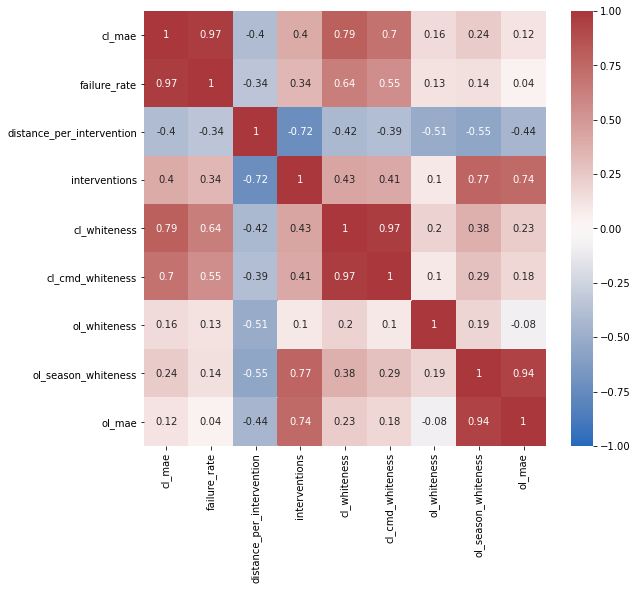

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
corr_mat = metrics_df.corr().round(2)
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

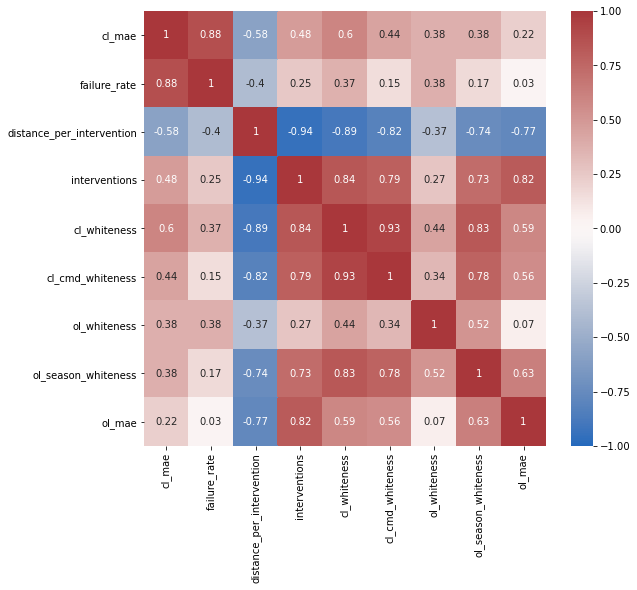

In [17]:
sp_corr_mat = metrics_df.corr(method="spearman").round(2)
plt.figure(figsize=(9, 8))
sns.heatmap(sp_corr_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

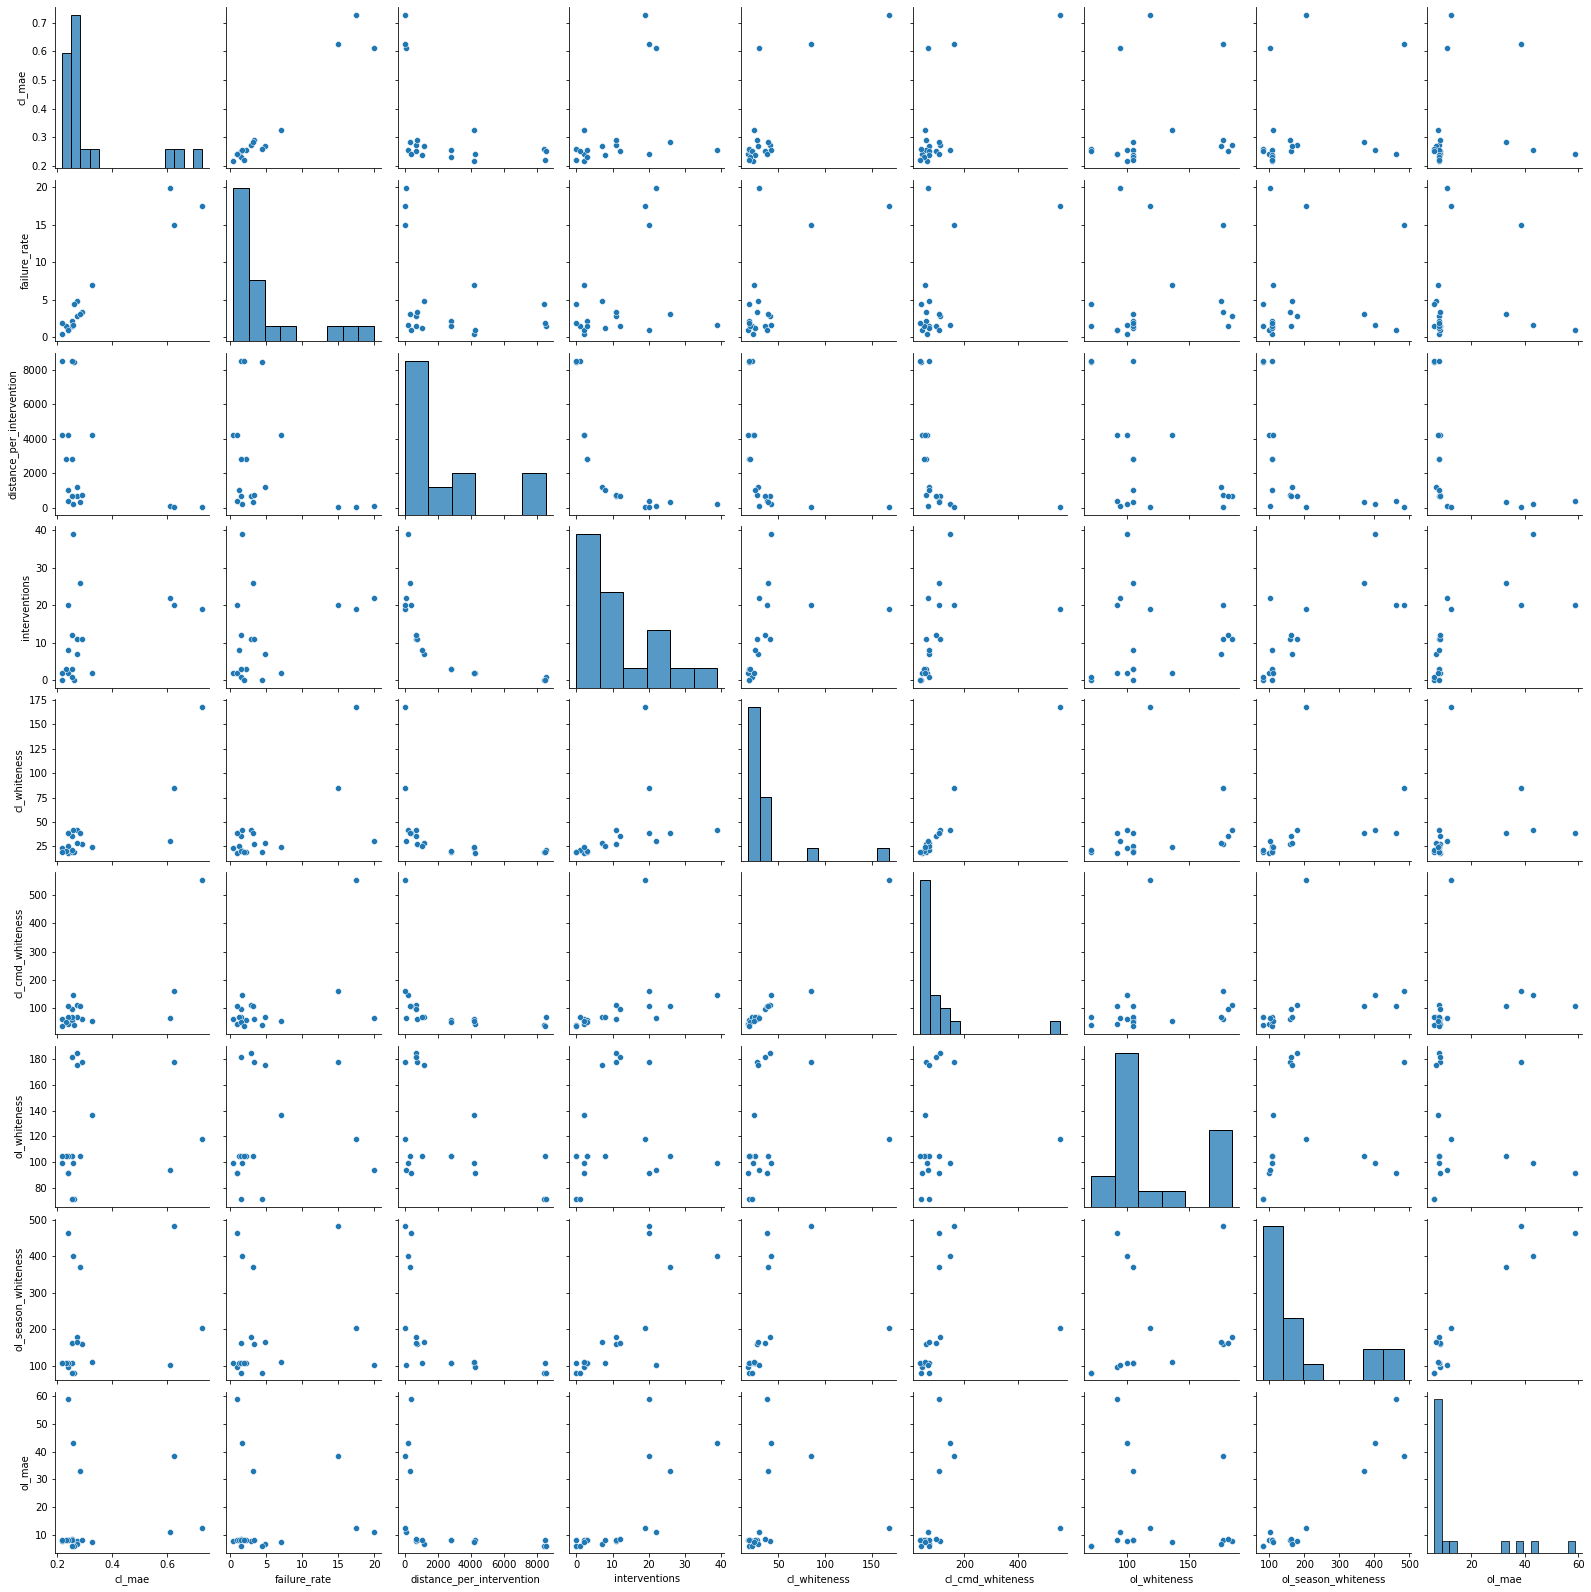

In [18]:
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sns.set(rc={'figure.facecolor':'white'})
sns.pairplot(metrics_df)
plt.savefig('metrics_pairwise.png', facecolor="white", edgecolor="none", transparent=False)

In [ ]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['ol_whiteness'], metrics_df['distance_per_intervention'])

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.ol_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

In [ ]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['cl_cmd_whiteness'], metrics_df['distance_per_intervention'])
#sns.regplot(x="closed_loop_whiteness", y="distance_per_intervention", data=metrics_df, order=2, ci=None)

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.cl_cmd_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

In [ ]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['closed_loop_whiteness'], metrics_df['interventions'])
#sns.regplot(x="closed_loop_whiteness", y="interventions", data=metrics_df, order=1, ci=None)

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.closed_loop_whiteness[line]+0.01, metrics_df.interventions[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

In [ ]:
def read_frames_driving(dataset_paths, filename):
    datasets = [pd.read_csv(dataset_path / filename) for dataset_path in dataset_paths]
    frames_df = pd.concat(datasets)
    frames_df = frames_df[['steering_angle', 'cmd_steering_angle', 'position_x', 'position_y', 'autonomous']].dropna()

    return frames_df

In [ ]:
from pathlib import Path

root_path = Path('/home/romet/data/datasets/rally-estonia/dataset')
drive_ds = [root_path / dataset_path for dataset_path in ['2021-11-25-15-04-26_e2e_rec_elva-l-camera-v3-0.8-forward']]
model_frames = read_frames_driving(drive_ds, "nvidia_frames.csv")

In [ ]:
model_frames

In [ ]:
plt.plot(model_frames.steering_angle)
plt.plot(model_frames.cmd_steering_angle*14.7)